In [9]:
import seaborn as sns

In [1]:
import algo_func
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sg
import matplotlib
import scipy as sp
import importlib
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('elec_data.csv',index_col = 0)
scaler = StandardScaler()
ot = np.expand_dims(data['OT'].array,axis =1)
ot_ = scaler.fit_transform(ot)

In [3]:
train,valid,test = ot_[0:10_000],ot_[10_000:11_000],ot_[11_000:]

In [6]:
fil_order = 7
train,val,test = ot_[0:10_000],ot_[10_000:11_000],ot_[11_000:]

ip_train = train
op_train = train[fil_order+1:]

ip_val = val
op_val = val[fil_order+1:]

ip_test = test
op_test = test[fil_order+1:]

In [8]:
rk_size_arr = np.concatenate((np.linspace(10,1,10),np.linspace(0.9,0.1,9),np.linspace(0.09,0.01,9)))
step_size_arr = np.concatenate((np.linspace(1,0.1,10),np.linspace(0.09,0.01,9),np.linspace(0.009,0.001,9)))

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

#klms_mse_train = np.zeros((k1,k2))
klms_mse_val = np.zeros((k1,k2))
#klms_mse_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        #klms_mse_train[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)
        #klms_mse_test[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)

28 28


100%|██████████████████████████████████████| 28/28 [1:04:16<00:00, 137.75s/it]


<Axes: >

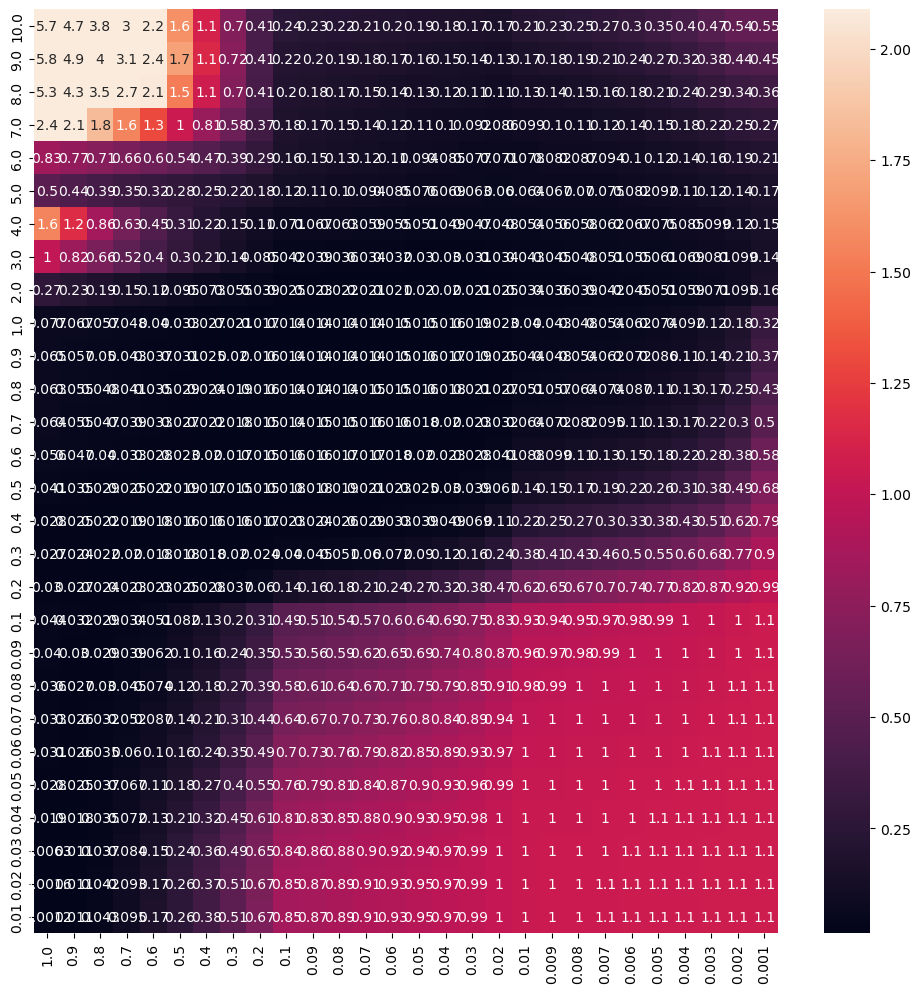

In [13]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(np.round(klms_mse_val,5),xticklabels= np.round(step_size_arr,3),yticklabels=np.round(rk_size_arr,3),robust = True,annot = True)

<Axes: >

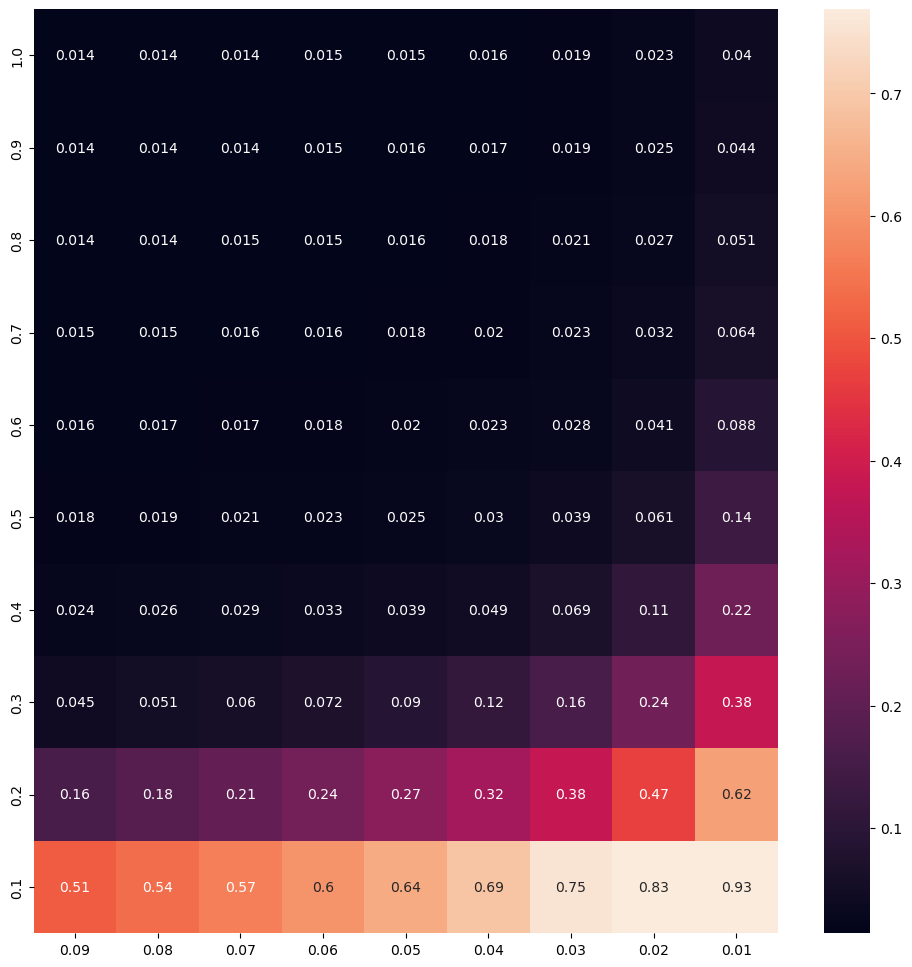

In [16]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(np.round(klms_mse_val[9:19,10:19],5),xticklabels= np.round(step_size_arr[10:19],3),yticklabels=np.round(rk_size_arr[9:19],3),robust = True,annot = True)

<Axes: >

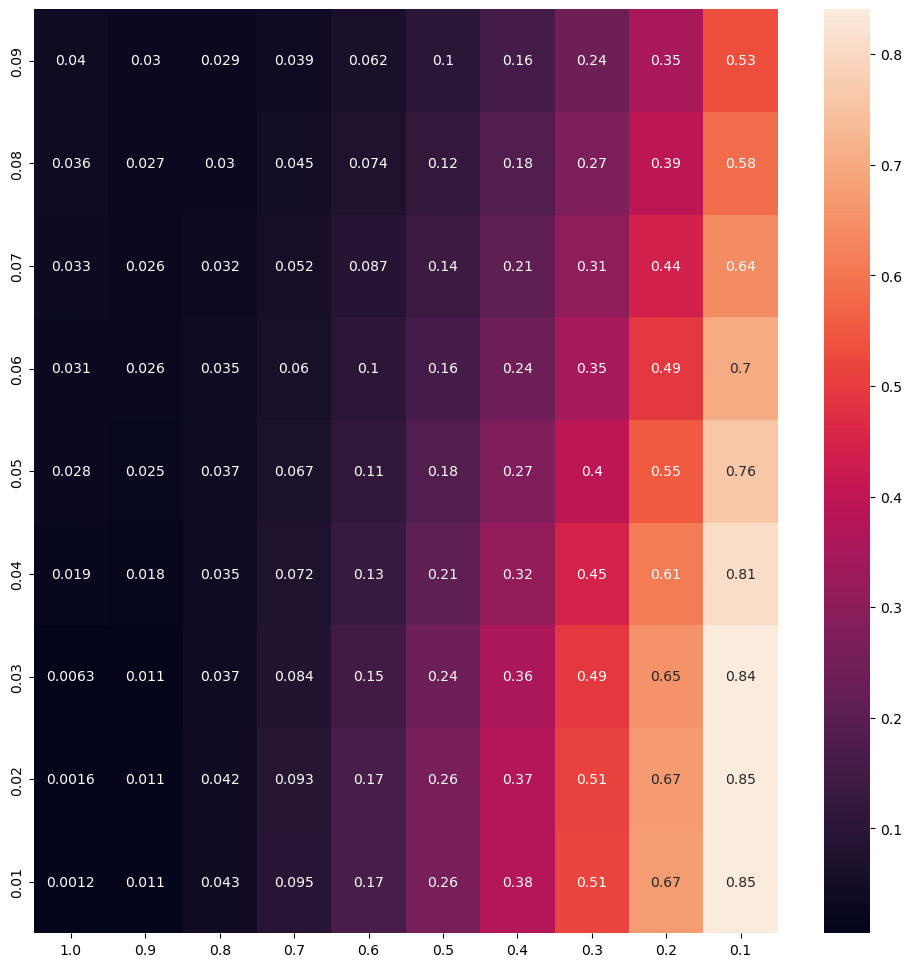

In [17]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(np.round(klms_mse_val[19:,0:10],5),xticklabels= np.round(step_size_arr[0:10],3),yticklabels=np.round(rk_size_arr[19:],3),robust = True,annot = True)

In [18]:
rk_size_arr = np.concatenate((np.linspace(0.03,0.01,3),np.linspace(0.009,0.001,9)))
step_size_arr = np.concatenate((np.linspace(2,1,10),np.linspace(0.9,0.5,5)))

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

#klms_mse_train = np.zeros((k1,k2))
klms_mse_val = np.zeros((k1,k2))
#klms_mse_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        #klms_mse_train[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)
        #klms_mse_test[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)

12 15


100%|█████████████████████████████████████████| 12/12 [13:02<00:00, 65.18s/it]


<Axes: >

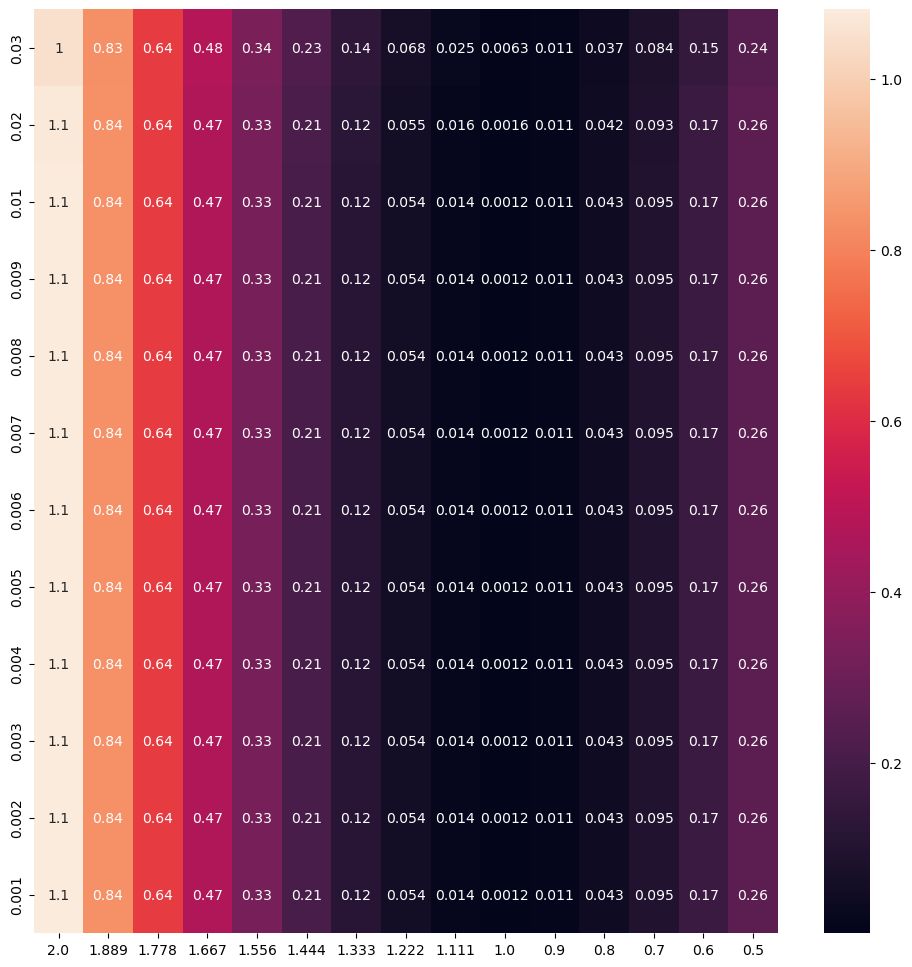

In [19]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(np.round(klms_mse_val,5),xticklabels= np.round(step_size_arr,3),yticklabels=np.round(rk_size_arr,3),robust = True,annot = True)

In [26]:
rk_size_arr = [0.922] # the best chosen from previous project , above values are overfitting
step_size_arr = [0.109]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

klms_mse_train = np.zeros((k1,k2))
klms_mse_val = np.zeros((k1,k2))
klms_mse_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        klms_mse_train[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)
        klms_mse_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
        klms_mse_test[i][j] = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
        
print(klms_mse_train)
print(klms_mse_val)
print(klms_mse_test)

1 1


100%|███████████████████████████████████████████| 1/1 [00:06<00:00,  6.66s/it]

[[0.01400795]]
[[0.0092154]]
[[0.05692478]]


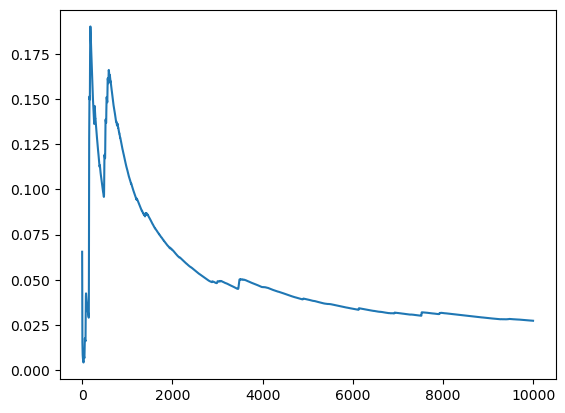

In [27]:
plt.plot(algo_func.learn_curve(e))

### Finding the kernel size of MCC

In [31]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = np.concatenate((np.linspace(1.5,1,5),np.linspace(0.9,0.1,9)))
rk_size_arr = [1.2,1,0.8,0.6,0.4,0.2]
step_size_arr = [0.5,0.3,0.1,0.09,0.07,0.05,0.03,0.01]
kern_size_arr = [1.2,1,0.8,0.6,0.4,0.2]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

k3 = len(kern_size_arr)

klms_mcc_val = np.zeros((k1,k2,k3))
klms_mcc_test = np.zeros((k1,k2,k3))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
    
        for k in range(k3):
            
            step_size = step_size_arr[j]
            kern_size = kern_size_arr[k]
            y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
            step_size = step_size/(kern_size**2)
            klms_mcc_val[i][j][k] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
            klms_mcc_test[i][j][k] = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
        
#print(klms_mcc_val)
#print(klms_mcc_test)

6 8


100%|██████████████████████████████████████████| 6/6 [21:06<00:00, 211.10s/it]

[[[2.16302108e-01 3.32816925e-01 1.00472778e+00 4.28144700e+00
   1.32660251e+02 2.15428346e+08]
  [1.84798587e-01 1.60582739e-01 3.84260297e-01 1.99269285e+00
   7.72046256e+00 7.85437182e+03]
  [1.87794081e-01 1.03302760e-01 4.59974817e-02 6.49907283e-01
   3.64799970e+01 4.42678219e+03]
  [1.87918579e-01 1.02228361e-01 3.93277068e-02 6.45941754e-01
   3.77359547e+01 5.38416893e+03]
  [1.87549140e-01 9.95924745e-02 2.89664115e-02 7.64312496e-01
   3.80319178e+01 5.13512356e+03]
  [1.86386094e-01 9.62904668e-02 2.66345989e-02 9.92366407e-01
   3.63413259e+01 8.54719253e+03]
  [1.85300861e-01 9.39263558e-02 3.84301260e-02 1.21587839e+00
   3.14736521e+01 7.43387347e+03]
  [1.86366163e-01 9.73008512e-02 5.01197735e-02 9.67480645e-01
   2.79238133e+01 1.03620730e+04]]

 [[2.06856380e-01 2.45740678e-01 5.69571730e-01 5.33078833e+00
   4.88776165e+01 1.33534551e+06]
  [1.92422987e-01 1.49156818e-01 2.78417569e-01 1.36627805e+00
   1.22781293e+01 3.61108849e+04]
  [1.92123339e-01 1.06078080

In [39]:
np.min(klms_mcc_val)

0.02663459893038845

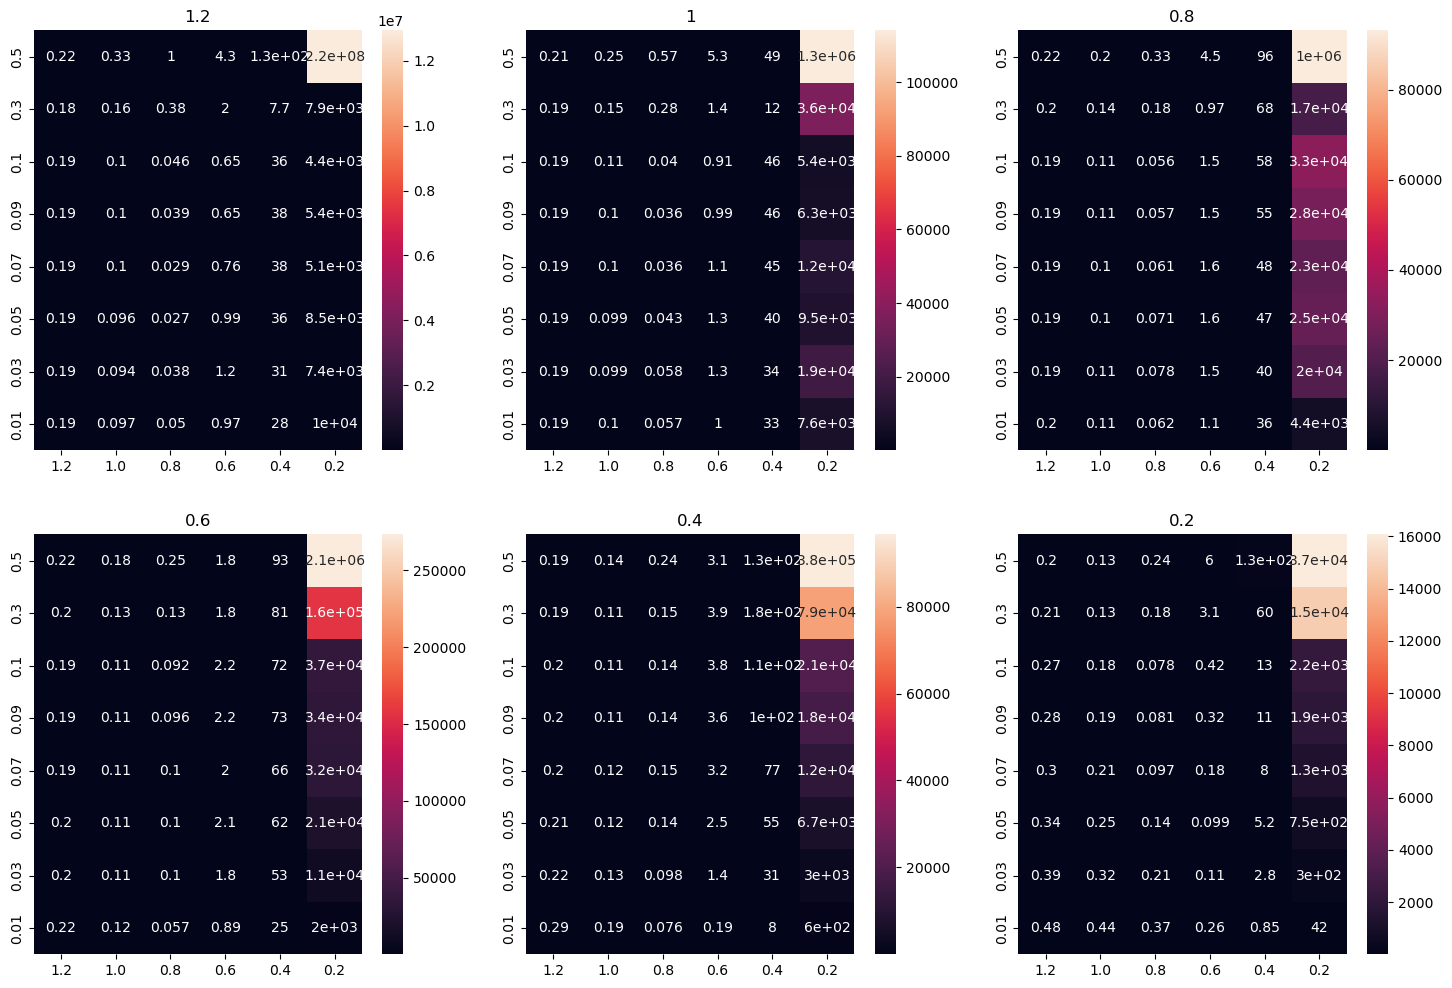

In [38]:
fig,axs = plt.subplots(nrows = 2,ncols =3,figsize =(18,12))

for i in range(k1):
    
    sns.heatmap(np.round(klms_mcc_val[i],5),xticklabels= np.round(kern_size_arr,3),yticklabels=np.round(step_size_arr,3),robust = True,annot = True,ax = axs[i//3][i%3])
    axs[i//3][i%3].set_title(str(kern_size_arr[i]))

### 0.8 kern size appear best for MCC, around it we can show the effect of MCC on test error
### will fix MCC kern size 0.8

In [123]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = np.concatenate((np.linspace(1.5,1,5),np.linspace(0.9,0.1,9)))
rk_size_arr = [1.6,1.4,1.2,1.0]
step_size_arr = [0.09,0.07,0.05,0.03]
kern_size_arr = [0.8]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

k3 = len(kern_size_arr)

klms_mcc_val = np.zeros((k1,k2))
klms_mcc_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
    
            
        step_size = step_size_arr[j]
        kern_size = kern_size_arr[0]
        y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
        step_size = step_size/(kern_size**2)
        klms_mcc_val[i][j],_ = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)
        klms_mcc_test[i][j],_ = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
        
#print(klms_mcc_val)
#print(klms_mcc_test)

4 4


100%|███████████████████████████████████████████████| 4/4 [01:07<00:00, 16.79s/it]


<Axes: >

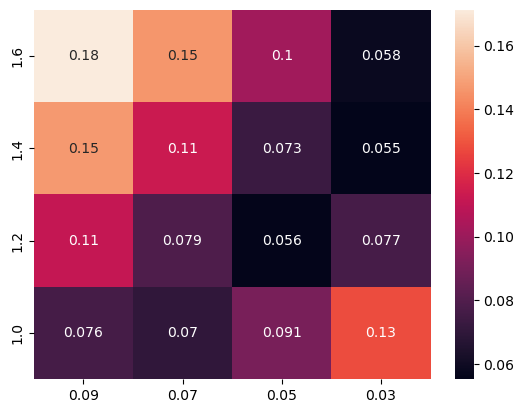

In [124]:
sns.heatmap(np.round(klms_mcc_val,4),xticklabels= np.round(step_size_arr,3),yticklabels=np.round(rk_size_arr,3),robust = True,annot = True)

<Axes: >

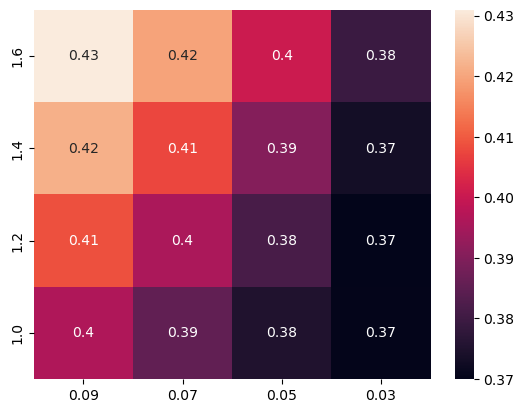

In [68]:
sns.heatmap(np.round(klms_mcc_test,4),xticklabels= np.round(step_size_arr,3),yticklabels=np.round(rk_size_arr,3),robust = True,annot = True)

### for KLMS MCC rk_size = 1.4, kern_size = 1.2 and step size = 0 .03

### Get error histogram for klms with MSE and MCC

In [46]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [69]:
rk_size_arr = [0.922] # the best chosen from previous project , above values are overfitting
step_size_arr = [0.109]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

#klms_mse_train = np.zeros((k1,k2))
#klms_mse_val = np.zeros((k1,k2))
klms_mse_test = np.zeros((k1,k2))
fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        #klms_mse_train[i][j] = algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)
        #klms_mse_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
        klms_mse_test[i][j],klms_test_e = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
        
#print(klms_mse_train)
#print(klms_mse_val)
#print(klms_mse_test)

1 1


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.18s/it]


In [136]:
#uptil now best k = 0.922 and eta = 0.109

rk_size_arr = np.concatenate((np.linspace(1.5,1,5),np.linspace(0.9,0.1,9)))
rk_size_arr = [1.4]
step_size_arr = [0.02]
kern_size_arr = [0.8]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

k3 = len(kern_size_arr)

#klms_mcc_val = np.zeros((k1,k2))
klms_mcc_test = np.zeros((k1,k2))

fil_order = 7

for i in tqdm(range(k1)):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
    
            
        step_size = step_size_arr[j]
        kern_size = kern_size_arr[0]
        y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
        step_size = step_size/(kern_size**2)
        #klms_mcc_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
        klms_mcc_test[i][j],klms_mcc_test_e_2 = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
        
#print(klms_mcc_val)
#print(klms_mcc_test)

1 1


100%|███████████████████████████████████████████████| 1/1 [00:03<00:00,  3.90s/it]


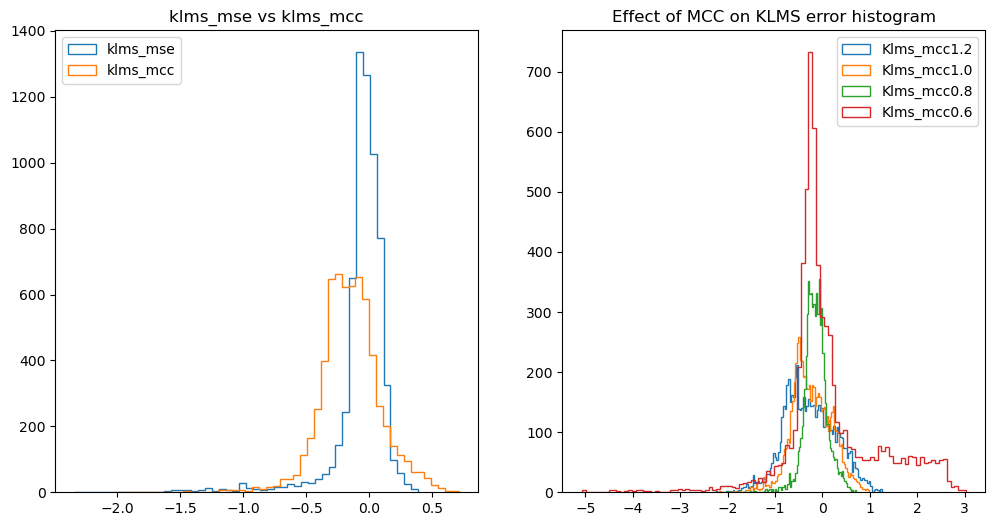

<Figure size 640x480 with 0 Axes>

In [138]:
fig,axs = plt.subplots(ncols = 2,figsize = (12,6))
_ = axs[0].hist(klms_test_e,bins = 50,label = 'klms_mse',histtype = 'step')
_ = axs[0].hist(klms_mcc_test_e_2,bins = 50,label = 'klms_mcc',histtype = 'step')
axs[0].set_title('klms_mse vs klms_mcc')
axs[0].legend()

fig = plt.figure()
for i in range(k3):
    
    _ = axs[1].hist(eror_mcc[i],bins = 100,label = 'Klms_mcc'+str(kern_size_arr[i]),histtype = 'step')

axs[1].set_title('Effect of MCC on KLMS error histogram')
    
axs[1].legend()




### Comparing the effect of kernel size for KLMS MCC

In [137]:
### effect of kernel size in lms_mcc

rk_size_arr = [1.4]
kern_size_arr = [1.2,1.0,0.8,0.6]
step_size_arr = [0.02]

eror_mcc = []

k3 = len(kern_size_arr)

for i in tqdm(range(k3)):
    
    rk_size = rk_size_arr[0]
    step_size = step_size_arr[0]
    kern_size = kern_size_arr[i]
    y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
    step_size = step_size/(kern_size**2)
    #klms_mcc_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
    _,klms_mcc_test_e = algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)
    eror_mcc.append(klms_mcc_test_e)

100%|███████████████████████████████████████████████| 4/4 [00:15<00:00,  3.97s/it]


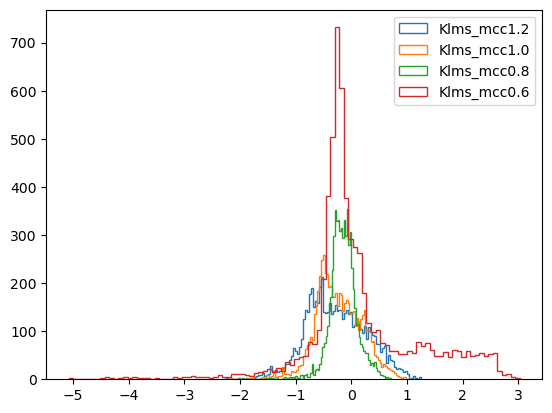

In [131]:
fig = plt.figure()
for i in range(k3):
    
    _ = plt.hist(eror_mcc[i],bins = 100,label = 'Klms_mcc'+str(kern_size_arr[i]),histtype = 'step')
    
plt.legend()

### for paticular step size and kernel size we can see that increase in kernel size from 0.8 to 1.2 is leading to accumulation of erros more into one center. However if we increase it further more we will see a wide spread in errors.  More with kernel size 1.2 the mean is away from zero , implying that global minima is yet to be found. With increase in the kernel size the standard deviation decreases

### Performance of KLMS MSE predictor in 10 samples ahead and 50 samples ahead

In [92]:
rk_size_arr = [0.922] # the best chosen from previous project , above values are overfitting
step_size_arr = [0.109]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

fil_order = 7

for i in range(k1):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        print(algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)[0])
        print(algo_func.mse_klms_ahead(ip_train,op_train,fil_order,e,centers,rk_size,step_size,10))
        print(algo_func.mse_klms_ahead(ip_train,op_train,fil_order,e,centers,rk_size,step_size,50))

1 1
0.014007948379793474


100%|██████████████████████████████████████| 9982/9982 [00:18<00:00, 533.62it/s]


0.3613943621620827


100%|██████████████████████████████████████| 9942/9942 [01:32<00:00, 107.06it/s]

0.6866136680074895


### The KLMS performed far better in predicting the samples ahead as compared to lms . This could be because the KLMS has already seen the training dataset and hence had better capability in generating less erros 

### On the test set KLMS performance much better in predicting the future values. Maybe the lms is overfitting the noise in data. While KLMS is able to get past the noise

### running on test set.

In [93]:
rk_size_arr = [0.922] # the best chosen from previous project , above values are overfitting
step_size_arr = [0.109]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

fil_order = 7

for i in range(k1):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,cnt = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        print(algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)[0])
        print(algo_func.mse_klms_ahead(ip_test,op_test,fil_order,e,centers,rk_size,step_size,10))
        print(algo_func.mse_klms_ahead(ip_test,op_test,fil_order,e,centers,rk_size,step_size,50))

1 1
0.05692477757266591


100%|██████████████████████████████████████| 6402/6402 [00:12<00:00, 495.55it/s]


0.45056308868068384


100%|███████████████████████████████████████| 6362/6362 [01:03<00:00, 99.87it/s]

0.6358449950484412


### Performance of KLMS with MCC on the 10,50 samples prediction ahead

In [ ]:
rk_size_arr = [1.4]
step_size_arr = [0.02]
kern_size_arr = [0.8]


fil_order = 7


    
rk_size = rk_size_arr[0]

    
            
step_size = step_size_arr[0]
kern_size = kern_size_arr[0]
y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
step_size = step_size/(kern_size**2)
#klms_mcc_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)
print('for the test dataset')
print(algo_func.klms_mseror(ip_test,op_test,fil_order,e,centers,rk_size,step_size)[0])
print(algo_func.mse_klms_ahead(ip_test,op_test,fil_order,e,centers,rk_size,step_size,10))
print(algo_func.mse_klms_ahead(ip_test,op_test,fil_order,e,centers,rk_size,step_size,50))

print('for the training dataset')

print(algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)[0])
print(algo_func.mse_klms_ahead(ip_train,op_train,fil_order,e,centers,rk_size,step_size,10))
print(algo_func.mse_klms_ahead(ip_train,op_train,fil_order,e,centers,rk_size,step_size,50))

        
#print(klms_mcc_val)
#print(klms_mcc_test)

### Trajectory generation for KLMS MSE and MCC and counting their average below the given threshold

In [109]:
importlib.reload(algo_func)

<module 'algo_func' from '/Users/skapoor/Desktop/academics/academics_2/mlts/project_2/algo_func.py'>

In [96]:
ot_threshold = 0.2*np.std(ip_train)
ot_threshold

0.20333503883700177

In [111]:
rk_size_arr = [0.922] # the best chosen from previous project , above values are overfitting
step_size_arr = [0.109]

k1,k2 = len(rk_size_arr),len(step_size_arr)

print(k1,k2)

fil_order = 7

for i in range(k1):
    
    rk_size = rk_size_arr[i]
    
    for j in range(k2):
        
        step_size = step_size_arr[j]
        y,e,centers,_ = algo_func.KLMS_mse_2(ip_train,op_train,fil_order,rk_size,step_size)
        print(algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)[0])
        #print(algo_func.mse_klms_ahead(ip_train,op_train,fil_order,e,centers,rk_size,step_size,10))
        #print(algo_func.mse_klms_ahead(ip_train,op_train,fil_order,e,centers,rk_size,step_size,50))

    
    
cnt_arr = []
cnt_max = 0
p_max = 0

for i in range(8,len(op_train)-1000):

    init_pos = i
    _,cnt,_ = algo_func.klms_trac_gen(ip_train,op_train,fil_order,e,centers,rk_size,step_size,init_pos,ot_threshold)
    
    if cnt>cnt_max:
        
        p_max = init_pos
        cnt_max = cnt
        
    cnt_arr.append(cnt)

np.average(cnt_arr)

1 1
0.014007948379793474


4.33926981300089

In [115]:
max(cnt_arr)

47

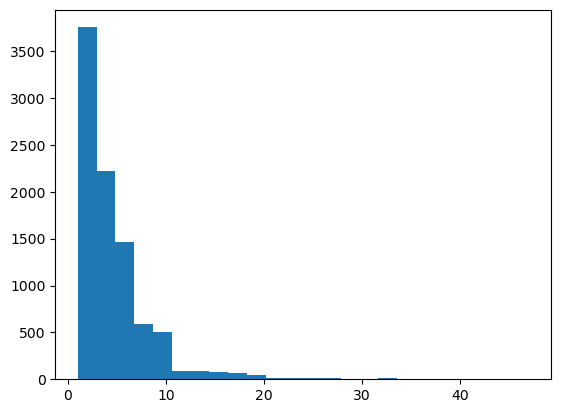

In [117]:
_ = plt.hist(cnt_arr,bins = 24)

In [118]:
rk_size_arr = [1.4]
step_size_arr = [0.02]
kern_size_arr = [0.8]


fil_order = 7


    
rk_size = rk_size_arr[0]

    
            
step_size = step_size_arr[0]
kern_size = kern_size_arr[0]
y,e,centers,cnt = algo_func.KLMS_mcc_2(ip_train,op_train,fil_order,rk_size,step_size,kern_size)
step_size = step_size/(kern_size**2)
#klms_mcc_val[i][j] = algo_func.klms_mseror(ip_val,op_val,fil_order,e,centers,rk_size,step_size)


print('for the training dataset')

print(algo_func.klms_mseror(ip_train,op_train,fil_order,e,centers,rk_size,step_size)[0])


cnt_arr_mcc = []
cnt_max = 0
p_max = 0

for i in range(8,len(op_train)-1000):

    init_pos = i
    _,cnt,_ = algo_func.klms_trac_gen(ip_train,op_train,fil_order,e,centers,rk_size,step_size,init_pos,ot_threshold)
    
    if cnt>cnt_max:
        
        p_max = init_pos
        cnt_max = cnt
        
    cnt_arr_mcc.append(cnt)

np.average(cnt_arr_mcc)

        
#print(klms_mcc_val)
#print(klms_mcc_test)

for the training dataset
0.05477087072095562


3.1526046304541406

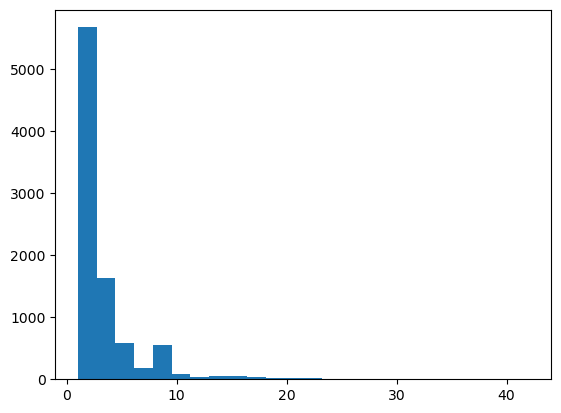

In [120]:
_ = plt.hist(cnt_arr_mcc,bins = 24)

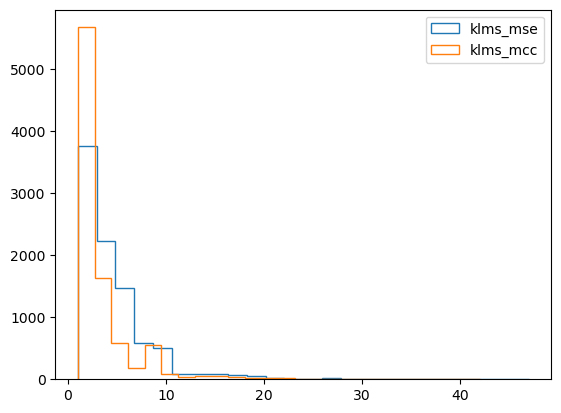

In [140]:
a1 = plt.hist(cnt_arr,bins = 24,label = 'klms_mse',histtype = 'step')
a2 = plt.hist(cnt_arr_mcc,bins = 24,label = 'klms_mcc',histtype = 'step')
plt.legend()